# **PROGETTO**

# FEATURES NUMERICHE, CATEGORIALI, DATA

In questo notebook tratto ed introduco le features numeriche, categoriali e di tipo data. Le varie features verranno aggiunte in modo incrementale. Nel successivo notebook verranno introdotte ulteriore features: di tipo insiemistico e di tipo testuale.

Spesso è necessario valutare se vale la pena aggiungere certe features o è necessario capire che alternativa è migliore nella lavorazione di certe features : uso lo score sul validation set per capire cosa è meglio fare e per orientarmi tra le varie possibili scelte. 

Verranno presi in considerazione 4 tipi di algoritmi di learning : kNN, regressione lineare, albero di decisione, random forest. Dunque per ogni possibile alternativa ho 4 modelli diversi e dunque ho 4 score sul validation set diversi. Scelgo l'alternativa e il modello che hanno score sul validation minore : questo è il modello migliore fino a quel momento ottenuto. Dunque la mia guida è sempre lo score sul validation e scelgo ciò che minimizza ciò.

Nel valutare questi 4 algoritmi faccio tuning su certi iperparametri.
1. Per kNN faccio tuning sul numero di vicini (lo indichiamo con k)
2. Per decision tree faccio tuning sul numero massimo di foglie (lo indichiamo con k)
3. Per random forest faccio tuning sul numero di alberi (lo indichiamo con k)

Linear regression invece non faccio tuning.

### FUNZIONI VALUTAZIONE E SELEZIONE MODELLI

Importo le **funzioni per la valutazione e selezione dei modelli**. 

Le funzioni compute_train_val_test e model_selection_TrainValTest effettuano la valutazione tramite gli score su training/validation/test, rispettivamente su un modello solo o su una lista di modelli. Le funzioni compute_bias_variance_erroe e model_selection_BiasVarianceError effettuano la valutazione tramite il calcolo di bias/variance/error, rispettivamente su un modello solo o su una lista di modelli.

Nel progetto uso lo **score sul validation** come misura principale per selezionare un modello. Uso il calcolo di bias/variance/error come misura ulteriore di bontà, in particolare per capire come poter migliorare il modello stesso.

In [1]:
from valutazione_modelli import compute_train_val_test, model_selection_TrainValTest, compute_bias_variance_error, \
                                                                model_selection_BiasVarianceError

# PRIMA LETTURA E FEATURES NUMERICHE

Per prima cosa effettuiamo la prima lettura del dataset e aggiungiamo nel modello le features numeriche: "budget", "popularity", "runtime".

La funzione **cleaning_data_numeric** effettua la prima lettura e lavora ed estrae le features numeriche. Ritorna:
- *dataframe*, che è il dataframe pandas grezzo e completo di tutte le features. L'unica operazione che ho eseguito è quella di rimuovere le istanze con valori non significativi di "revenue". (*dataframe* mi serve perchè di fatto contiene tutto il dataset).
- *df*, che è il dataframe pandas che ha solo le features esplicative (X) fin'ora prese in considerazione e lavorate. Dunque per ora contiene solo le features numeriche lavorate opportunamente, come specificato nel notebook di analisi del dataset. Il dataframe *df* ha dunque 4 features: "budget", "budget_dummy", "popularity", "runtime".
- *y*, che è l'array numpy relativo a solo "revenue". I valori sono stati opportunamente scalati tramite MinMaxMScaler. 

In tutto il progetto uso sia dataframe pandas (come *dataframe* e *df*) che array numpy (come *y*). I dataframe li uso per gestire, lavorare e visualizzare meglio il dataset e le features selezionate. Gli array numpy li uso per valutare i modelli.

In [2]:
from lavorazione_dataset_NumCatData import cleaning_data_numeric

dataframe, df, y = cleaning_data_numeric()

In [3]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2943 entries, 0 to 2999
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   budget        2943 non-null   float64
 1   budget_dummy  2943 non-null   int32  
 2   popularity    2943 non-null   float64
 3   runtime       2943 non-null   float64
dtypes: float64(3), int32(1)
memory usage: 103.5 KB


,budget,budget_dummy,popularity,runtime
count,2.943000e+03,2943.000000,2943.000000,2943.000000
mean,2.904396e+07,0.266055,8.561427,108.396655
std,3.479934e+07,0.441968,12.175863,20.920262
min,2.500000e+03,0.000000,0.000001,40.000000
25%,9.500000e+06,0.000000,4.215948,95.000000
50%,2.294052e+07,0.000000,7.441117,105.000000
75%,3.000000e+07,1.000000,10.946306,118.000000
max,3.800000e+08,1.000000,294.337037,338.000000


Definiamo l'array numpy *X*. *X* è semplicemente la versione numpy di *df*. Come detto, gli array numpy li uso per valutare i modelli. Dunque valuterò i modelli sempre passando *X* e *y*.

In [3]:
X = df.values 

# PREDITTORE BANALE : revenue come funzione lineare del solo budget.

Il primo modello che prendiamo in considerazione è un modello che considera solo "budget" come feature per spiegare "revenue". Predittore banale. In particolare consideriamo la regressione lineare tra "revenue" e "budget".

In [4]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=True) # Modello regressione lineare

# Calcolo gli score su training/validation/test della regressione lineare con solo "budget".
train, val, test = compute_train_val_test1(model, X[:,0:1], y)

print("MSE : ",val)

MSE :  0.003941546138667958


Questo è il nostro primo score ottenuto.

# SOLO FEATURES NUMERICHE 

Consideriamo ora tutte e 4 le features numeriche messe in X. Valutiamo i 4 algoritmi di learning su tale dataset.

### **1) KNN (con preprocessing)**

MSE migliore:  0.003274847961645496  | k:  9


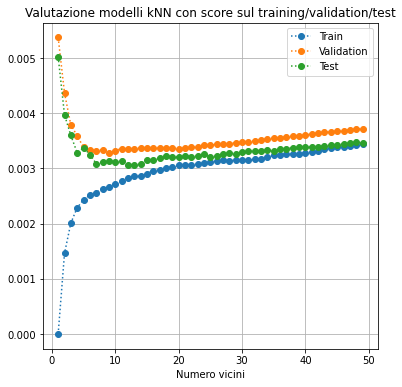

In [11]:
from sklearn.neighbors import KNeighborsRegressor

models = [KNeighborsRegressor(n_neighbors=k) for k in range(1,50)]

list_trainValTest , best_model = model_selection_TrainValTest(models, X ,y ,scale=True, plotta=True, plottaTrain=True, 
                                                    plottaTest=True, xvalues=range(1,50), xlabel="Numero vicini", 
                                                    title="Valutazione modelli kNN con score sul training/validation/test" )

print("MSE migliore: ",list_trainValTest[best_model][1]," | k: ",list(range(1,50))[best_model])

Meglio del predittore banale.

### 2) DECISION TREE REGRESSOR

MSE migliore:  0.0037196055971774763  | k:  51


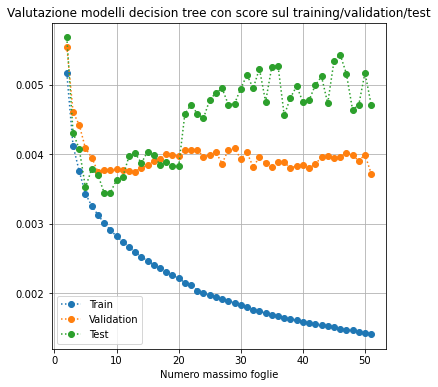

In [14]:
from sklearn.tree import DecisionTreeRegressor

models = [DecisionTreeRegressor(max_leaf_nodes=k) for k in range(2,52)]

list_trainValTest , best_model = model_selection_TrainValTest(models, X, y, plotta=True, plottaTrain=True, plottaTest=True,
                                            xvalues=range(2,52), xlabel="Numero massimo foglie",
                                            title="Valutazione modelli decision tree con score sul training/validation/test" )

print("MSE migliore: ",list_trainValTest[best_model][1]," | k: ",list(range(2,52))[best_model])

### 3) LINEAR REGRESSION

In [13]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=True) # Modello regressione lineare

train, val, test = compute_train_val_test(model, X, y)

print("MSE : ",val)

MSE :  0.003266990786261166


### 4) RANDOM FOREST

MSE migliore:  0.003157106076117885  | k:  34


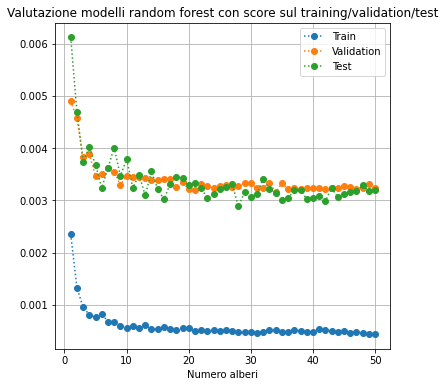

In [5]:
from sklearn.ensemble import RandomForestRegressor

models = [RandomForestRegressor(n_estimators=k) for k in range(1,51)]

list_trainValTest , best_model = model_selection_TrainValTest(models, X, y, plotta=True, plottaTrain=True, plottaTest=True,
                                            xvalues=range(1,51), xlabel="Numero alberi",
                                            title="Valutazione modelli random forest con score sul training/validation/test" )

print("MSE migliore: ",list_trainValTest[best_model][1]," | k: ",list(range(1,51))[best_model])

Tutti e 4 modelli sono migliori del predittore banale. Il modello migliore è random forest, con un MSE sul validation di 0.00316. (34 alberi)

# AGGIUNTA FEATURES CATEGORIALI

Aggiungiamo ora le features categoriali: "belongs_to_collection", "homepage", "original_language".

Le features "belongs_to_collection" e "homepage" ho già descritto come le tratto. Invece abbiamo due alternative su come trattare "original_language". Per prima cosa allora aggiungiamo "belongs_to_collection" e "homepage".

La funzione **add_categorial** prende il dataframe completo (*dataframe*) e ritorna newdf, che è il datframe con le sole features categoriali selezionate e da aggiungere (appunto "belongs_to_collection" e "homepage"). Ritorna dunque solo le feature oggetto di studio, lavorate e processate. 

Concatendando *df* e *newdf* in *df_tmp* otteniamo di fatto il dataframe con tutte le features fin'ora lavorate e selzionate. Sovrascriveremo *df* con *df_tmp* solo nel caso in cui ne valga la pena, ovvero solo nel caso in cui l'aggiunta di tali features migliora effettivamente il modello.

In [17]:
from lavorazione_dataset_NumCatData import add_categorial
import pandas as pd

newdf = add_categorial(dataframe) # newdf è il dataframe delle sole feature categoriali in questione, processate e lavorate.

df_tmp = pd.concat([df,newdf],axis=1)

Ora quindi abbiamo 6 features in tutto. Ecco le features aggiunte.

In [18]:
print(newdf.info())
newdf.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2943 entries, 0 to 2999
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   belongs_to_collection  2943 non-null   int32
 1   homepage               2943 non-null   int32
dtypes: int32(2)
memory usage: 46.0 KB
None


,belongs_to_collection,homepage
count,2943.000000,2943.000000
mean,0.203534,0.317363
std,0.402695,0.465529
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,1.000000
max,1.000000,1.000000


In [18]:
X = df_tmp.values

Valutiamo i 4 algoritmi di learning su tale dataset.

### **1) KNN (con preprocessing)**

MSE migliore:  0.0030900271402999587  | k:  8


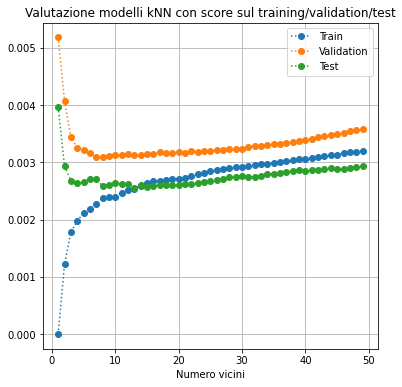

In [22]:
from sklearn.neighbors import KNeighborsRegressor

models = [KNeighborsRegressor(n_neighbors=k) for k in range(1,50)]

list_trainValTest , best_model = model_selection_TrainValTest(models, X ,y ,scale=True, plotta=True, plottaTrain=True, 
                                                    plottaTest=True, xvalues=range(1,50), xlabel="Numero vicini", 
                                                    title="Valutazione modelli kNN con score sul training/validation/test" )

print("MSE migliore: ",list_trainValTest[best_model][1]," | k: ",list(range(1,50))[best_model])

### 2) DECISION TREE REGRESSOR

MSE migliore:  0.003636012580774361  | k:  12


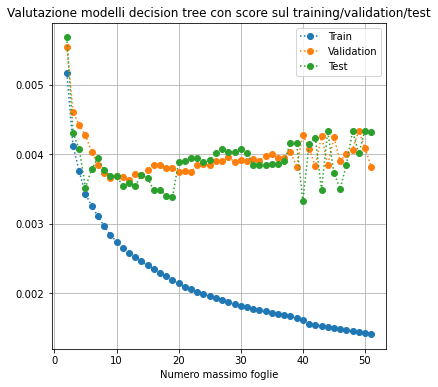

In [23]:
from sklearn.tree import DecisionTreeRegressor

models = [DecisionTreeRegressor(max_leaf_nodes=k) for k in range(2,52)]

list_trainValTest , best_model = model_selection_TrainValTest(models, X, y, plotta=True, plottaTrain=True, plottaTest=True,
                                            xvalues=range(2,52), xlabel="Numero massimo foglie",
                                            title="Valutazione modelli decision tree con score sul training/validation/test" )

print("MSE migliore: ",list_trainValTest[best_model][1]," | k: ",list(range(2,52))[best_model])

### 3) LINEAR REGRESSION

In [24]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=True) # Modello regressione lineare

train, val, test = compute_train_val_test(model, X, y)

print("MSE : ",val)

MSE :  0.003027217124926855


### 4) RANDOM FOREST

MSE migliore:  0.00291691202078572  | k:  49


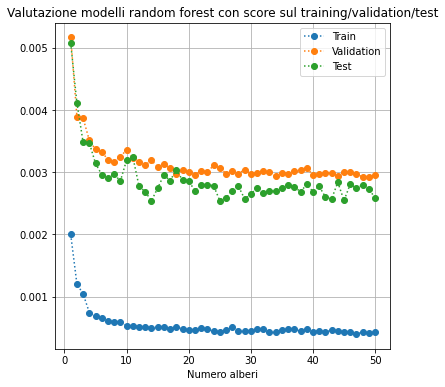

In [20]:
from sklearn.ensemble import RandomForestRegressor

models = [RandomForestRegressor(n_estimators=k) for k in range(1,51)]

list_trainValTest , best_model = model_selection_TrainValTest(models, X, y, plotta=True, plottaTrain=True, plottaTest=True,
                                            xvalues=range(1,51), xlabel="Numero alberi",
                                            title="Valutazione modelli random forest con score sul training/validation/test" )

print("MSE migliore: ",list_trainValTest[best_model][1]," | k: ",list(range(1,51))[best_model])

kNN, albero di decisione e regressione lineare rimangono piuttosto stabili rispetto a prima. La random forest migliora il suo MSE sul validation. Il modello migliore ora risulta la random forest con anche le features categoriali. MSE : 0.00292. (49 alberi).

Dunque **aggiungiamo tali features**: riportiamo ciò su df.

In [9]:
df = df_tmp

**ORIGINAL_LANGUAGE**

Aggiungiamo ora la feature "original_language". Abbiamo due alternative su come trattare "original_language". La funzione **add_language_1** esegue la prima alternativa, mentre la funzione **add_language_2** esegue la seconda alternativa. 

Entrambe le funzioni prendono in input il dataframe completo (*dataframe*) e ritornano *newdf*, ovvero il datframe delle features selezionate e lavorate. add_language_1 --> *newdf_1* ; add_language_2 --> *newdf_2*.    

Concateniamo *df* con *newdf_1* in *df_tmp_1* e *df* con *newdf_2* in *df_tmp_2*. Valutiamo quale alternativa è migliore e sovrascriviamo sulla base di ciò *df*.

**Alternativa 1**

"original_language" diventa semplicemente una feature dummy : vale 1 se il film è in lingua inglese, 0 altrimenti.
Aggiungiamo dunque un ulteriore feature. 

In [10]:
from lavorazione_dataset_NumCatData import add_language_1
import pandas as pd

newdf_1 = add_language_1(dataframe)

df_tmp_1 = pd.concat([df,newdf_1],axis=1)

Ora abbiamo 7 features in tutto. Vediamo la feature aggiunta.

In [28]:
print(newdf_1.info())
newdf1.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2943 entries, 0 to 2999
Data columns (total 1 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   original_language  2943 non-null   int32
dtypes: int32(1)
memory usage: 34.5 KB
None


,original_language
count,2943.000000
mean,0.860347
std,0.346686
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,1.000000


Andiamo a valutare.

In [11]:
X = df_tmp_1.values

### **1) KNN (con preprocessing)**

MSE migliore:  0.00305841484563747  | k:  8


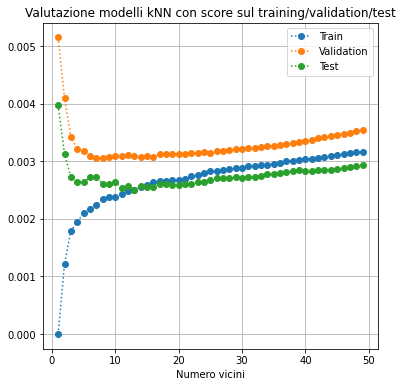

In [31]:
from sklearn.neighbors import KNeighborsRegressor

models = [KNeighborsRegressor(n_neighbors=k) for k in range(1,50)]

list_trainValTest , best_model = model_selection_TrainValTest(models, X ,y ,scale=True, plotta=True, plottaTrain=True, 
                                                    plottaTest=True, xvalues=range(1,50), xlabel="Numero vicini", 
                                                    title="Valutazione modelli kNN con score sul training/validation/test" )

print("MSE migliore: ",list_trainValTest[best_model][1]," | k: ",list(range(1,50))[best_model])

### 2) DECISION TREE REGRESSOR

MSE migliore:  0.0036360125807743614  | k:  12


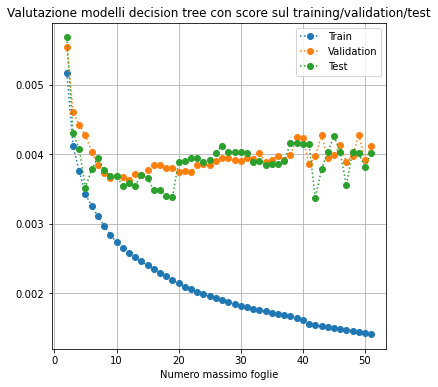

In [32]:
from sklearn.tree import DecisionTreeRegressor

models = [DecisionTreeRegressor(max_leaf_nodes=k) for k in range(2,52)]

list_trainValTest , best_model = model_selection_TrainValTest(models, X, y, plotta=True, plottaTrain=True, plottaTest=True,
                                            xvalues=range(2,52), xlabel="Numero massimo foglie",
                                            title="Valutazione modelli decision tree con score sul training/validation/test" )

print("MSE migliore: ",list_trainValTest[best_model][1]," | k: ",list(range(2,52))[best_model])

### 3) LINEAR REGRESSION

In [33]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=True) # Modello regressione lineare

train, val, test = compute_train_val_test(model, X, y)

print("MSE : ",val)

MSE :  0.0030279721615750987


### 4) RANDOM FOREST

MSE migliore:  0.002868495673118281  | k:  39


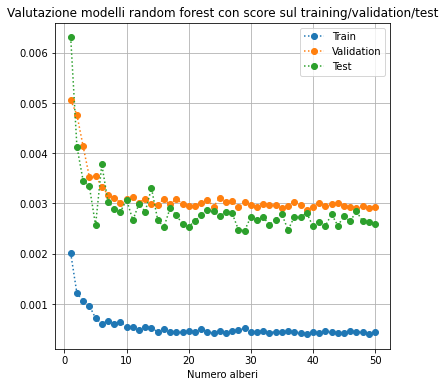

In [15]:
from sklearn.ensemble import RandomForestRegressor

models = [RandomForestRegressor(n_estimators=k) for k in range(1,51)]

list_trainValTest , best_model = model_selection_TrainValTest(models, X, y, plotta=True, plottaTrain=True, plottaTest=True,
                                            xvalues=range(1,51), xlabel="Numero alberi",
                                            title="Valutazione modelli random forest con score sul training/validation/test" )

print("MSE migliore: ",list_trainValTest[best_model][1]," | k: ",list(range(1,51))[best_model])

C'è un miglioramento complessivo dei modelli. Ed in particolare la random forest migliora molto il suo MSE sul validation. Dunque ora il modello migliore risulta la random forest con anche "original_language" trattata nella prima alternativa. MSE : 0.002868. (39 alberi)

**Alternativa 2**

Le prime 7 lingue rispetto al revenue medio le tengo come valori categoriali distinti. Tutte le altre lingue le accorpo nella categoria "other_language". Ho dunque una variabile categoriale con 8 valori distinti: tale feature la trasformo in 8 variabili binarie(dummy).

Aggiungo in totale 8 feature in più.

In [13]:
from lavorazione_dataset_NumCatData import add_language_2
import pandas as pd

newdf_2 = add_language_2(dataframe)

df_tmp_2 = pd.concat([df,newdf_2],axis=1)

Abbiamo in totale 14 features. Vediamo le features aggiunte.

In [15]:
print(newdf_2.info())
newdf_2.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2943 entries, 0 to 2999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   zh              2943 non-null   uint8
 1   en              2943 non-null   uint8
 2   tr              2943 non-null   uint8
 3   ja              2943 non-null   uint8
 4   cn              2943 non-null   uint8
 5   hi              2943 non-null   uint8
 6   de              2943 non-null   uint8
 7   other_language  2943 non-null   uint8
dtypes: uint8(8)
memory usage: 46.0 KB
None


,zh,en,tr,ja,cn,hi,de,other_language
count,2943.000000,2943.000000,2943.000000,2943.000000,2943.000000,2943.000000,2943.000000,2943.000000
mean,0.005776,0.860347,0.001019,0.012232,0.006796,0.013252,0.005776,0.094801
std,0.075796,0.346686,0.031917,0.109940,0.082170,0.114371,0.075796,0.292990
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [14]:
X = df_tmp_2.values

### **1) KNN (con preprocessing)**

MSE migliore:  0.0030794267012323588  | k:  8


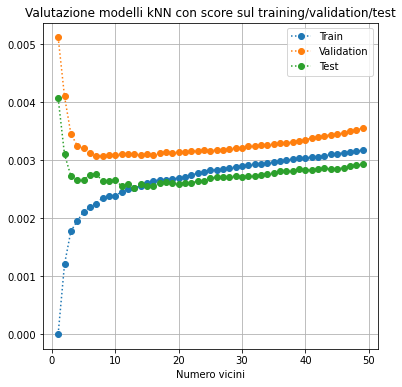

In [17]:
from sklearn.neighbors import KNeighborsRegressor

models = [KNeighborsRegressor(n_neighbors=k) for k in range(1,50)]

list_trainValTest , best_model = model_selection_TrainValTest(models, X ,y ,scale=True, plotta=True, plottaTrain=True, 
                                                    plottaTest=True, xvalues=range(1,50), xlabel="Numero vicini", 
                                                    title="Valutazione modelli kNN con score sul training/validation/test" )

print("MSE migliore: ",list_trainValTest[best_model][1]," | k: ",list(range(1,50))[best_model])

### 2) DECISION TREE REGRESSOR

MSE migliore:  0.003636012580774361  | k:  12


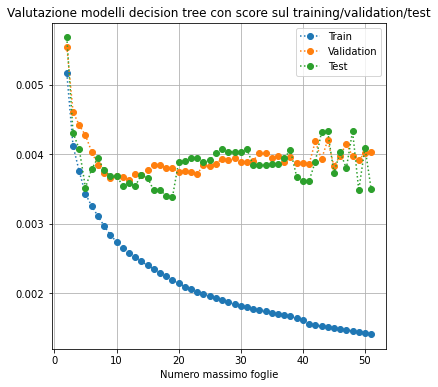

In [18]:
from sklearn.tree import DecisionTreeRegressor

models = [DecisionTreeRegressor(max_leaf_nodes=k) for k in range(2,52)]

list_trainValTest , best_model = model_selection_TrainValTest(models, X, y, plotta=True, plottaTrain=True, plottaTest=True,
                                            xvalues=range(2,52), xlabel="Numero massimo foglie",
                                            title="Valutazione modelli decision tree con score sul training/validation/test" )

print("MSE migliore: ",list_trainValTest[best_model][1]," | k: ",list(range(2,52))[best_model])

### 3) LINEAR REGRESSION

In [19]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=True) # Modello regressione lineare

train, val, test = compute_train_val_test(model, X, y)

print("MSE : ",val)

MSE :  0.0030354477918669346


### 4) RANDOM FOREST

MSE migliore:  0.002890429954409866  | k:  37


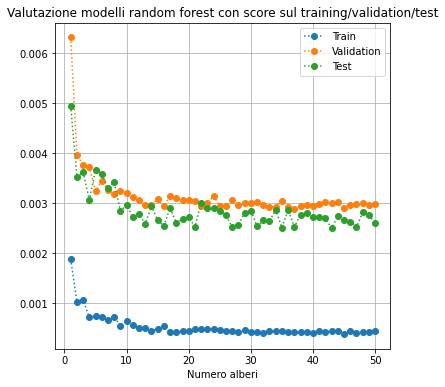

In [16]:
from sklearn.ensemble import RandomForestRegressor

models = [RandomForestRegressor(n_estimators=k) for k in range(1,51)]

list_trainValTest , best_model = model_selection_TrainValTest(models, X, y, plotta=True, plottaTrain=True, plottaTest=True,
                                            xvalues=range(1,51), xlabel="Numero alberi",
                                            title="Valutazione modelli random forest con score sul training/validation/test" )

print("MSE migliore: ",list_trainValTest[best_model][1]," | k: ",list(range(1,51))[best_model])

Gli score sono molto simili a quelli dell'alternativa 1. In ogni caso, lo score sul validation della random forest è peggiorato: dunque il MSE migliore c'era con l'alternativa 1. **Scegliamo l'alternativa 1.**

In [21]:
df = df_tmp_1

# AGGIUNTA FEATURES DATA

Aggiungiamo l'unica feature di tipo data: "release_date". Come visto, estraiamo da tale feature sia l'anno che il mese. Per l'anno lo trattiamo banalmente come feature numerica, per il mese invece abbiamo 6 alternative diverse da valutare.

Per ogni diversa alternativa c'è una diversa funzione. Ogni funzione prende in input il dataframe completo (*dataframe*) e ritornano *newdf*, ovvero il datframe delle features selezionate e lavorate. Siccome abbiamo 6 diverse funzioni, otteniamo 6 diversi *newdf* : *newdf_1* *newdf_2* *newdf_3* *newdf_4* *newdf_5* *newdf_6*.

Concatendo *df* con i vari *newdf* otteniamo 6 diversi *df_tmp_i*. Valutiamo quale alternativa è migliore e sovrascriviamo sulla base di ciò *df*.

## ALTERNATIVA 1

Considero il mese semplicemente come una variabile categoriale a 12 livelli: da ciò 12 features dummy binarie.

In [22]:
from lavorazione_dataset_NumCatData import add_data_1
import pandas as pd

newdf_1 = add_data_1(dataframe) 

df_tmp_1 = pd.concat([df,newdf_1],axis=1)

Ora quindi abbiamo 20 features in tutto. Ecco le features aggiunte.

In [23]:
print(newdf_1.info())
newdf_1.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2943 entries, 0 to 2999
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   year    2943 non-null   int64
 1   gen     2943 non-null   uint8
 2   feb     2943 non-null   uint8
 3   mar     2943 non-null   uint8
 4   apr     2943 non-null   uint8
 5   may     2943 non-null   uint8
 6   jun     2943 non-null   uint8
 7   jul     2943 non-null   uint8
 8   aug     2943 non-null   uint8
 9   sep     2943 non-null   uint8
 10  oct     2943 non-null   uint8
 11  nov     2943 non-null   uint8
 12  dec     2943 non-null   uint8
dtypes: int64(1), uint8(12)
memory usage: 80.5 KB
None


,year,gen,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec
count,2943.000000,2943.000000,2943.000000,2943.000000,2943.000000,2943.000000,2943.000000,2943.000000,2943.000000,2943.000000,2943.000000,2943.000000,2943.000000
mean,1999.796126,0.069997,0.074414,0.079511,0.082909,0.074754,0.078491,0.070676,0.085967,0.119606,0.102277,0.073734,0.087666
std,15.220358,0.255185,0.262488,0.270580,0.275791,0.263038,0.268989,0.256327,0.280363,0.324555,0.303063,0.261382,0.282856
min,1921.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1993.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2004.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2011.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2017.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [25]:
X = df_tmp_1.values

Valutiamo i 4 algoritmi di learning su tale dataset.

### **1) KNN (con preprocessing)**

MSE migliore:  0.004054620541045222  | k:  2


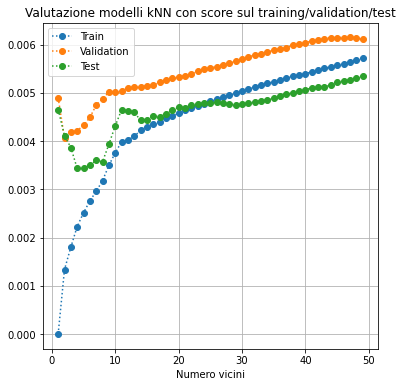

In [9]:
from sklearn.neighbors import KNeighborsRegressor

models = [KNeighborsRegressor(n_neighbors=k) for k in range(1,50)]

list_trainValTest , best_model = model_selection_TrainValTest(models, X ,y ,scale=True, plotta=True, plottaTrain=True, 
                                                    plottaTest=True, xvalues=range(1,50), xlabel="Numero vicini", 
                                                    title="Valutazione modelli kNN con score sul training/validation/test" )

print("MSE migliore: ",list_trainValTest[best_model][1]," | k: ",list(range(1,50))[best_model])

### 2) DECISION TREE REGRESSOR

MSE migliore:  0.0035631307899930743  | k:  12


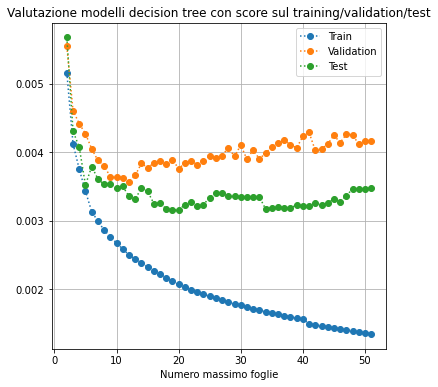

In [10]:
from sklearn.tree import DecisionTreeRegressor

models = [DecisionTreeRegressor(max_leaf_nodes=k) for k in range(2,52)]

list_trainValTest , best_model = model_selection_TrainValTest(models, X, y, plotta=True, plottaTrain=True, plottaTest=True,
                                            xvalues=range(2,52), xlabel="Numero massimo foglie",
                                            title="Valutazione modelli decision tree con score sul training/validation/test" )

print("MSE migliore: ",list_trainValTest[best_model][1]," | k: ",list(range(2,52))[best_model])

### 3) LINEAR REGRESSION

In [11]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=True) # Modello regressione lineare

train, val, test = compute_train_val_test(model, X, y)

print("MSE : ",val)

MSE :  0.0030141282297215825


### 4) RANDOM FOREST

MSE migliore:  0.0026986017100130806  | k:  43


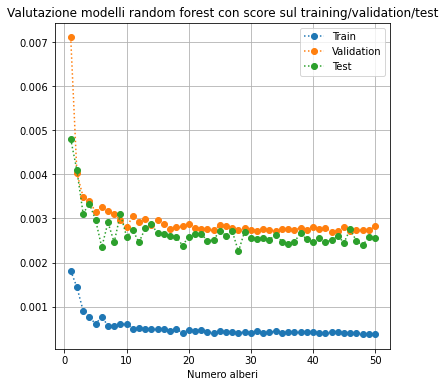

In [26]:
from sklearn.ensemble import RandomForestRegressor

models = [RandomForestRegressor(n_estimators=k) for k in range(1,51)]

list_trainValTest , best_model = model_selection_TrainValTest(models, X, y, plotta=True, plottaTrain=True, plottaTest=True,
                                            xvalues=range(1,51), xlabel="Numero alberi",
                                            title="Valutazione modelli random forest con score sul training/validation/test" )

print("MSE migliore: ",list_trainValTest[best_model][1]," | k: ",list(range(1,51))[best_model])

Lo score migliore è, come sempre, quello della random forest. MSE : 0.002699 (43 alberi). Lo score è migliorato rispetto al modello senza features della data.

## ALTERNATIVA 2

Tengo come valori distinti solo i primi 5 mesi rispetto alla numerosità di film: tutti gli altri film li accorpo nel livello "other_month". Ottengo quindi 6 livelli possibili --> 6 nuove features dummy.

In [27]:
from lavorazione_dataset_NumCatData import add_data_2
import pandas as pd

newdf_2 = add_data_2(dataframe) 

df_tmp_2 = pd.concat([df,newdf_2],axis=1)

Ora quindi abbiamo 14 features in tutto. Ecco le features aggiunte.

In [5]:
print(newdf_2.info())
newdf_2.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2943 entries, 0 to 2999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   year         2943 non-null   int64
 1   sep          2943 non-null   int32
 2   oct          2943 non-null   int32
 3   dec          2943 non-null   int32
 4   aug          2943 non-null   int32
 5   apr          2943 non-null   int32
 6   other_month  2943 non-null   int64
dtypes: int32(5), int64(2)
memory usage: 126.5 KB
None


,year,sep,oct,dec,aug,apr,other_month
count,2943.000000,2943.000000,2943.000000,2943.000000,2943.000000,2943.000000,2943.000000
mean,1999.796126,0.119606,0.102277,0.087666,0.085967,0.082909,0.214407
std,15.220358,0.324555,0.303063,0.282856,0.280363,0.275791,0.410480
min,1921.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1993.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2004.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2011.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2017.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [28]:
X = df_tmp_2.values

Valutiamo i 4 algoritmi di learning su tale dataset.

### **1) KNN (con preprocessing)**

MSE migliore:  0.00362015988930369  | k:  2


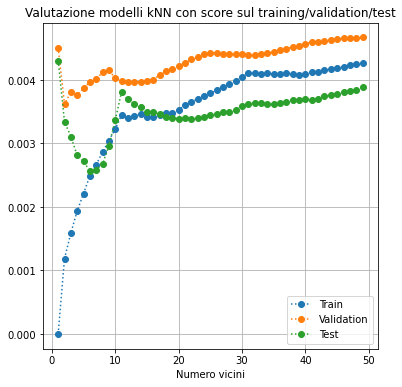

In [7]:
from sklearn.neighbors import KNeighborsRegressor

models = [KNeighborsRegressor(n_neighbors=k) for k in range(1,50)]

list_trainValTest , best_model = model_selection_TrainValTest(models, X ,y ,scale=True, plotta=True, plottaTrain=True, 
                                                    plottaTest=True, xvalues=range(1,50), xlabel="Numero vicini", 
                                                    title="Valutazione modelli kNN con score sul training/validation/test" )

print("MSE migliore: ",list_trainValTest[best_model][1]," | k: ",list(range(1,50))[best_model])

### 2) DECISION TREE REGRESSOR

MSE migliore:  0.0035614476350532887  | k:  12


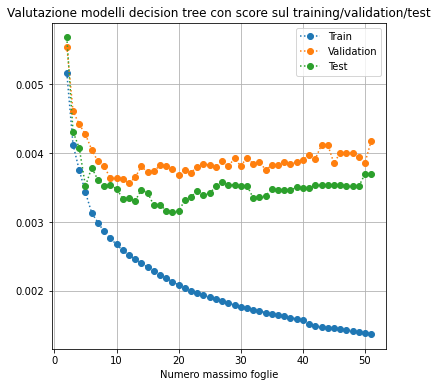

In [8]:
from sklearn.tree import DecisionTreeRegressor

models = [DecisionTreeRegressor(max_leaf_nodes=k) for k in range(2,52)]

list_trainValTest , best_model = model_selection_TrainValTest(models, X, y, plotta=True, plottaTrain=True, plottaTest=True,
                                            xvalues=range(2,52), xlabel="Numero massimo foglie",
                                            title="Valutazione modelli decision tree con score sul training/validation/test" )

print("MSE migliore: ",list_trainValTest[best_model][1]," | k: ",list(range(2,52))[best_model])

### 3) LINEAR REGRESSION

In [9]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=True) # Modello regressione lineare

train, val, test = compute_train_val_test(model, X, y)

print("MSE : ",val)

MSE :  0.0030094827336334144


### 4) RANDOM FOREST

MSE migliore:  0.0026956274045434924  | k:  41


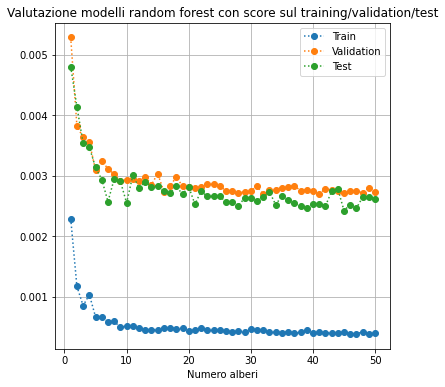

In [29]:
from sklearn.ensemble import RandomForestRegressor

models = [RandomForestRegressor(n_estimators=k) for k in range(1,51)]

list_trainValTest , best_model = model_selection_TrainValTest(models, X, y, plotta=True, plottaTrain=True, plottaTest=True,
                                            xvalues=range(1,51), xlabel="Numero alberi",
                                            title="Valutazione modelli random forest con score sul training/validation/test" )

print("MSE migliore: ",list_trainValTest[best_model][1]," | k: ",list(range(1,51))[best_model])

Lo score minore (sempre di random forest) è migliore rispetto all'alternativa 1.  MSE : 0.002696(41 alberi).

## ALTERNATIVA 3

Considero come valori possibili solo i primi 5 mesi con media revenue maggiore. Tutti gli altri mesi li accorpo nel valore "other_month". Ottengo quindi 6 livelli possibili --> 6 nuove features dummy.

In [30]:
from lavorazione_dataset_NumCatData import add_data_3
import pandas as pd

newdf_3 = add_data_3(dataframe) 

df_tmp_3 = pd.concat([df,newdf_3],axis=1)

Ora quindi abbiamo 14 features in tutto. Ecco le features aggiunte.

In [3]:
print(newdf_3.info())
newdf_3.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2943 entries, 0 to 2999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   year         2943 non-null   int64
 1   jun          2943 non-null   int32
 2   dec          2943 non-null   int32
 3   jul          2943 non-null   int32
 4   may          2943 non-null   int32
 5   nov          2943 non-null   int32
 6   other_month  2943 non-null   int64
dtypes: int32(5), int64(2)
memory usage: 126.5 KB
None


,year,jun,dec,jul,may,nov,other_month
count,2943.000000,2943.000000,2943.000000,2943.000000,2943.000000,2943.000000,2943.000000
mean,1999.796126,0.078491,0.087666,0.070676,0.074754,0.073734,0.614679
std,15.220358,0.268989,0.282856,0.256327,0.263038,0.261382,0.486754
min,1921.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1993.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2004.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,2011.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,2017.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [31]:
X = df_tmp_3.values

Valutiamo i 4 algoritmi di learning su tale dataset.

### **1) KNN (con preprocessing)**

MSE migliore:  0.0036721813546296738  | k:  4


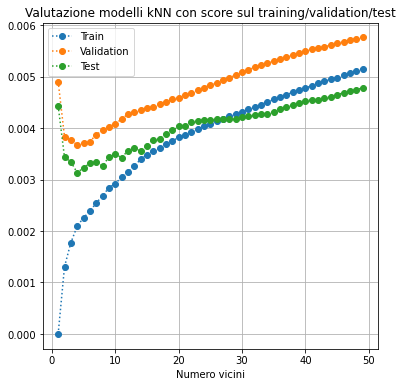

In [7]:
from sklearn.neighbors import KNeighborsRegressor

models = [KNeighborsRegressor(n_neighbors=k) for k in range(1,50)]

list_trainValTest , best_model = model_selection_TrainValTest(models, X ,y ,scale=True, plotta=True, plottaTrain=True, 
                                                    plottaTest=True, xvalues=range(1,50), xlabel="Numero vicini", 
                                                    title="Valutazione modelli kNN con score sul training/validation/test" )

print("MSE migliore: ",list_trainValTest[best_model][1]," | k: ",list(range(1,50))[best_model])

### 2) DECISION TREE REGRESSOR

MSE migliore:  0.0036021422947714516  | k:  12


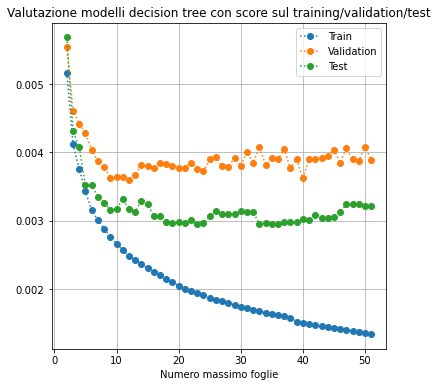

In [8]:
from sklearn.tree import DecisionTreeRegressor

models = [DecisionTreeRegressor(max_leaf_nodes=k) for k in range(2,52)]

list_trainValTest , best_model = model_selection_TrainValTest(models, X, y, plotta=True, plottaTrain=True, plottaTest=True,
                                            xvalues=range(2,52), xlabel="Numero massimo foglie",
                                            title="Valutazione modelli decision tree con score sul training/validation/test" )

print("MSE migliore: ",list_trainValTest[best_model][1]," | k: ",list(range(2,52))[best_model])

### 3) LINEAR REGRESSION

In [9]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=True) # Modello regressione lineare

train, val, test = compute_train_val_test(model, X, y)

print("MSE : ",val)

MSE :  0.0030163765210121252


### 4) RANDOM FOREST

MSE migliore:  0.002686418614642118  | k:  41


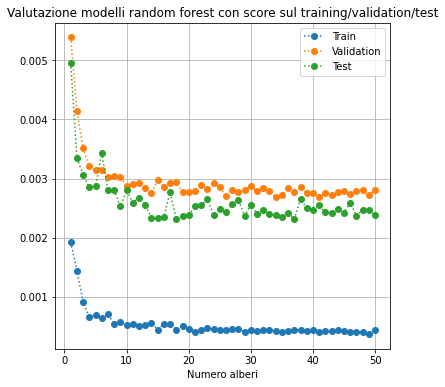

In [32]:
from sklearn.ensemble import RandomForestRegressor

models = [RandomForestRegressor(n_estimators=k) for k in range(1,51)]

list_trainValTest , best_model = model_selection_TrainValTest(models, X, y, plotta=True, plottaTrain=True, plottaTest=True,
                                            xvalues=range(1,51), xlabel="Numero alberi",
                                            title="Valutazione modelli random forest con score sul training/validation/test" )

print("MSE migliore: ",list_trainValTest[best_model][1]," | k: ",list(range(1,51))[best_model])

Lo score minore (sempre di random forest) è migliore rispetto all'alternativa 2: per ora l'alternativa 3 è la migliore. MSE : 0.002686 (41 alberi).

## ALTERNATIVA 4

Creiamo una sola feature categoriale binaria (dummy) : 1 se il mese del film è nei primi 6 mesi con revenue maggiore ; 0 se è nei 6 con revenue peggiore. 

In [33]:
from lavorazione_dataset_NumCatData import add_data_4
import pandas as pd

newdf_4 = add_data_4(dataframe) 

df_tmp_4 = pd.concat([df,newdf_4],axis=1)

Ora quindi abbiamo 9 features in tutto. Ecco le features aggiunte.

In [3]:
print(newdf_4.info())
newdf_4.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2943 entries, 0 to 2999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   year    2943 non-null   int64
 1   month   2943 non-null   int64
dtypes: int64(2)
memory usage: 69.0 KB
None


,year,month
count,2943.000000,2943.000000
mean,1999.796126,0.464832
std,15.220358,0.498846
min,1921.000000,0.000000
25%,1993.000000,0.000000
50%,2004.000000,0.000000
75%,2011.000000,1.000000
max,2017.000000,1.000000


In [42]:
X = df_tmp_4.values

Valutiamo i 4 algoritmi di learning su tale dataset.

### **1) KNN (con preprocessing)**

MSE migliore:  0.003198636098418034  | k:  4


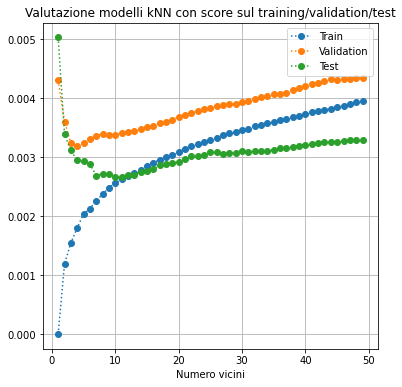

In [5]:
from sklearn.neighbors import KNeighborsRegressor

models = [KNeighborsRegressor(n_neighbors=k) for k in range(1,50)]

list_trainValTest , best_model = model_selection_TrainValTest(models, X ,y ,scale=True, plotta=True, plottaTrain=True, 
                                                    plottaTest=True, xvalues=range(1,50), xlabel="Numero vicini", 
                                                    title="Valutazione modelli kNN con score sul training/validation/test" )

print("MSE migliore: ",list_trainValTest[best_model][1]," | k: ",list(range(1,50))[best_model])

### 2) DECISION TREE REGRESSOR

MSE migliore:  0.0036037666434928796  | k:  12


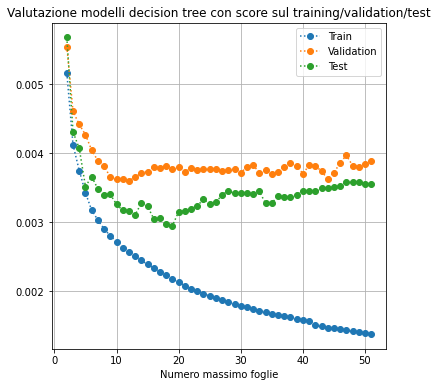

In [6]:
from sklearn.tree import DecisionTreeRegressor

models = [DecisionTreeRegressor(max_leaf_nodes=k) for k in range(2,52)]

list_trainValTest , best_model = model_selection_TrainValTest(models, X, y, plotta=True, plottaTrain=True, plottaTest=True,
                                            xvalues=range(2,52), xlabel="Numero massimo foglie",
                                            title="Valutazione modelli decision tree con score sul training/validation/test" )

print("MSE migliore: ",list_trainValTest[best_model][1]," | k: ",list(range(2,52))[best_model])

### 3) LINEAR REGRESSION

In [7]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=True) # Modello regressione lineare

train, val, test = compute_train_val_test(model, X, y)

print("MSE : ",val)

MSE :  0.003003535664250761


### 4) RANDOM FOREST

MSE migliore:  0.0026956743803049936  | k:  36


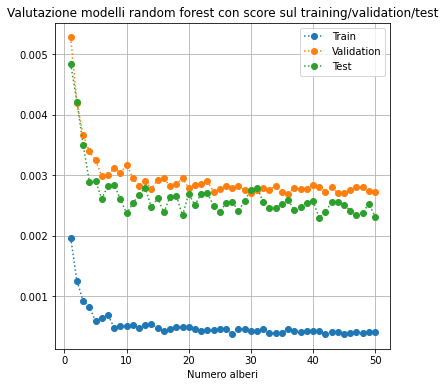

In [43]:
from sklearn.ensemble import RandomForestRegressor

models = [RandomForestRegressor(n_estimators=k) for k in range(1,51)]

list_trainValTest , best_model = model_selection_TrainValTest(models, X, y, plotta=True, plottaTrain=True, plottaTest=True,
                                            xvalues=range(1,51), xlabel="Numero alberi",
                                            title="Valutazione modelli random forest con score sul training/validation/test" )

print("MSE migliore: ",list_trainValTest[best_model][1]," | k: ",list(range(1,51))[best_model])

Lo score minore (sempre di random forest) non è migliore rispetto all'alternativa 3: l'alternativa 3 rimane la migliore.

## ALTERNATIVA 5

Dividiamo i mesi in 3 gruppi : il primo mese più rilevante ; gli altri 5 mesi più rilevanti ; i restanti 6 mesi più rilevanti.
Feature categoriale con 3 livelli --> dunque 3 features dummy.

In [36]:
from lavorazione_dataset_NumCatData import add_data_5
import pandas as pd

newdf_5 = add_data_5(dataframe) 

df_tmp_5 = pd.concat([df,newdf_5],axis=1)

Ora quindi abbiamo 11 features in tutto. Ecco le features aggiunte.

In [4]:
print(newdf_5.info())
newdf_5.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2943 entries, 0 to 2999
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   year           2943 non-null   int64
 1   month_group_1  2943 non-null   uint8
 2   month_group_2  2943 non-null   uint8
 3   month_group_3  2943 non-null   uint8
dtypes: int64(1), uint8(3)
memory usage: 54.6 KB
None


,year,month_group_1,month_group_2,month_group_3
count,2943.000000,2943.000000,2943.000000,2943.000000
mean,1999.796126,0.078491,0.386340,0.535168
std,15.220358,0.268989,0.486993,0.498846
min,1921.000000,0.000000,0.000000,0.000000
25%,1993.000000,0.000000,0.000000,0.000000
50%,2004.000000,0.000000,0.000000,1.000000
75%,2011.000000,0.000000,1.000000,1.000000
max,2017.000000,1.000000,1.000000,1.000000


In [37]:
X = df_tmp_5.values

Valutiamo i 4 algoritmi di learning su tale dataset.

### **1) KNN (con preprocessing)**

MSE migliore:  0.0030331000820939306  | k:  4


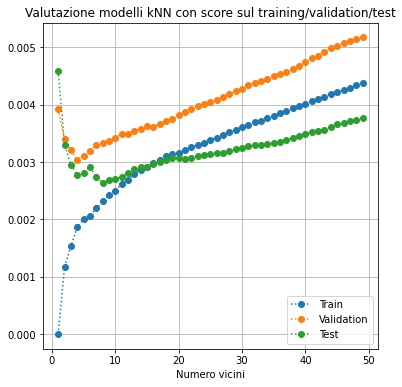

In [7]:
from sklearn.neighbors import KNeighborsRegressor

models = [KNeighborsRegressor(n_neighbors=k) for k in range(1,50)]

list_trainValTest , best_model = model_selection_TrainValTest(models, X ,y ,scale=True, plotta=True, plottaTrain=True, 
                                                    plottaTest=True, xvalues=range(1,50), xlabel="Numero vicini", 
                                                    title="Valutazione modelli kNN con score sul training/validation/test" )

print("MSE migliore: ",list_trainValTest[best_model][1]," | k: ",list(range(1,50))[best_model])

### 2) DECISION TREE REGRESSOR

MSE migliore:  0.003630437775036629  | k:  11


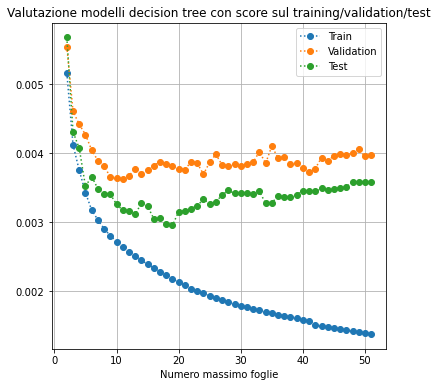

In [8]:
from sklearn.tree import DecisionTreeRegressor

models = [DecisionTreeRegressor(max_leaf_nodes=k) for k in range(2,52)]

list_trainValTest , best_model = model_selection_TrainValTest(models, X, y, plotta=True, plottaTrain=True, plottaTest=True,
                                            xvalues=range(2,52), xlabel="Numero massimo foglie",
                                            title="Valutazione modelli decision tree con score sul training/validation/test" )

print("MSE migliore: ",list_trainValTest[best_model][1]," | k: ",list(range(2,52))[best_model])

### 3) LINEAR REGRESSION

In [9]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=True) # Modello regressione lineare

train, val, test = compute_train_val_test(model, X, y)

print("MSE : ",val)

MSE :  0.0030177435640194672


### 4) RANDOM FOREST

MSE migliore:  0.0026877408227620643  | k:  30


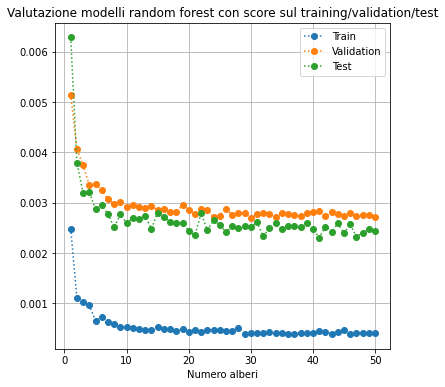

In [38]:
from sklearn.ensemble import RandomForestRegressor

models = [RandomForestRegressor(n_estimators=k) for k in range(1,51)]

list_trainValTest , best_model = model_selection_TrainValTest(models, X, y, plotta=True, plottaTrain=True, plottaTest=True,
                                            xvalues=range(1,51), xlabel="Numero alberi",
                                            title="Valutazione modelli random forest con score sul training/validation/test" )

print("MSE migliore: ",list_trainValTest[best_model][1]," | k: ",list(range(1,51))[best_model])

Lo score minore (sempre di random forest) non è migliore rispetto all'alternativa 3: l'alternativa 3 rimane la migliore.

## ALTERNATIVA 6

Dividiamo i mesi in 3 gruppi : primi 4 mesi migliori rispetto a revenue; successivi 4 mesi migliori ; ultimi 4 mesi. Dunque sempre 3 livelli, ma questa volta più bilanciati. Dunque abbiamo 3 livelli possibili per la features categorica mese: da ciò 3 features dummy binarie.

In [39]:
from lavorazione_dataset_NumCatData import add_data_6
import pandas as pd

newdf_6 = add_data_6(dataframe) 

df_tmp_6 = pd.concat([df,newdf_6],axis=1)

Ora quindi abbiamo 11 features in tutto. Ecco le features aggiunte.

In [14]:
print(newdf_6.info())
newdf_6.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2943 entries, 0 to 2999
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   year           2943 non-null   int64
 1   month_group_1  2943 non-null   uint8
 2   month_group_2  2943 non-null   uint8
 3   month_group_3  2943 non-null   uint8
dtypes: int64(1), uint8(3)
memory usage: 54.6 KB
None


,year,month_group_1,month_group_2,month_group_3
count,2943.000000,2943.000000,2943.000000,2943.000000
mean,1999.796126,0.311587,0.310567,0.377846
std,15.220358,0.463221,0.462805,0.484931
min,1921.000000,0.000000,0.000000,0.000000
25%,1993.000000,0.000000,0.000000,0.000000
50%,2004.000000,0.000000,0.000000,0.000000
75%,2011.000000,1.000000,1.000000,1.000000
max,2017.000000,1.000000,1.000000,1.000000


In [44]:
X = df_tmp_6.values

Valutiamo i 4 algoritmi di learning su tale dataset.

### **1) KNN (con preprocessing)**

MSE migliore:  0.0032985225754586693  | k:  8


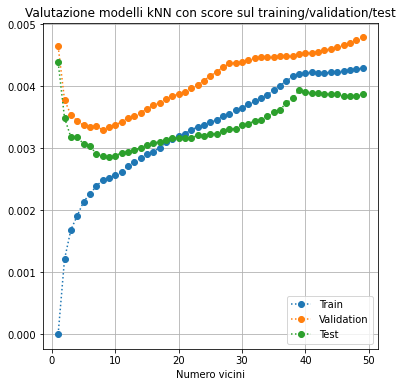

In [12]:
from sklearn.neighbors import KNeighborsRegressor

models = [KNeighborsRegressor(n_neighbors=k) for k in range(1,50)]

list_trainValTest , best_model = model_selection_TrainValTest(models, X ,y ,scale=True, plotta=True, plottaTrain=True, 
                                                    plottaTest=True, xvalues=range(1,50), xlabel="Numero vicini", 
                                                    title="Valutazione modelli kNN con score sul training/validation/test" )

print("MSE migliore: ",list_trainValTest[best_model][1]," | k: ",list(range(1,50))[best_model])

### 2) DECISION TREE REGRESSOR

MSE migliore:  0.0037353947899219026  | k:  9


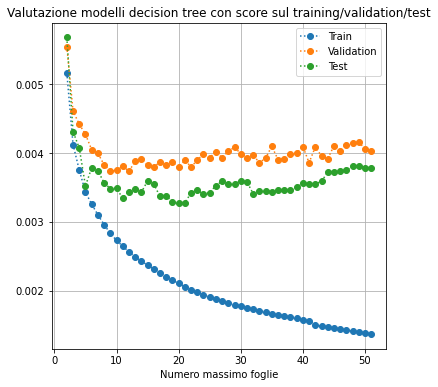

In [13]:
from sklearn.tree import DecisionTreeRegressor

models = [DecisionTreeRegressor(max_leaf_nodes=k) for k in range(2,52)]

list_trainValTest , best_model = model_selection_TrainValTest(models, X, y, plotta=True, plottaTrain=True, plottaTest=True,
                                            xvalues=range(2,52), xlabel="Numero massimo foglie",
                                            title="Valutazione modelli decision tree con score sul training/validation/test" )

print("MSE migliore: ",list_trainValTest[best_model][1]," | k: ",list(range(2,52))[best_model])

### 3) LINEAR REGRESSION

In [14]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=True) # Modello regressione lineare

train, val, test = compute_train_val_test(model, X, y)

print("MSE : ",val)

MSE :  0.002990533213107489


### 4) RANDOM FOREST

MSE migliore:  0.0026721842311812276  | k:  39


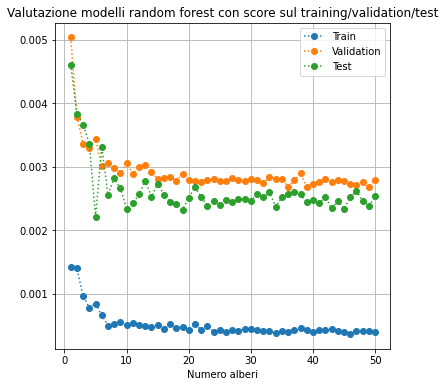

In [41]:
from sklearn.ensemble import RandomForestRegressor

models = [RandomForestRegressor(n_estimators=k) for k in range(1,51)]

list_trainValTest , best_model = model_selection_TrainValTest(models, X, y, plotta=True, plottaTrain=True, plottaTest=True,
                                            xvalues=range(1,51), xlabel="Numero alberi",
                                            title="Valutazione modelli random forest con score sul training/validation/test" )

print("MSE migliore: ",list_trainValTest[best_model][1]," | k: ",list(range(1,51))[best_model])

Lo score minore (sempre di random forest) è migliore rispetto all'alternativa 3: l'alternativa 6 è la migliore. **In definitiva dunque scegliamo l'alternativa 6.** MSE : 0.002672 (39 alberi).

Riportiamo ciò su *df*.

In [10]:
df = df_tmp_6

**Il dataset lavorato ottenuto fin'ora è dunque il seguente. 11 features.**

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2943 entries, 0 to 2999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   budget                 2943 non-null   float64
 1   budget_dummy           2943 non-null   int32  
 2   popularity             2943 non-null   float64
 3   runtime                2943 non-null   float64
 4   belongs_to_collection  2943 non-null   int32  
 5   homepage               2943 non-null   int32  
 6   original_language      2943 non-null   int32  
 7   year                   2943 non-null   int64  
 8   month_group_1          2943 non-null   uint8  
 9   month_group_2          2943 non-null   uint8  
 10  month_group_3          2943 non-null   uint8  
dtypes: float64(3), int32(4), int64(1), uint8(3)
memory usage: 169.6 KB


**Il migliore modello risulta random forest con 39 alberi. MSE : 0.002672.**

Nel notebook successivo si introducono le features di tipo insiemistico e testuale.